# Project: Investigate a Dataset
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li></ul>

<a id='intro'></a>
## Introduction

The Movie Database (TMDb) is a community built movie and TV database. Every piece of data has been added by our amazing community dating back to 2008. TMDb's strong international focus and breadth of data is largely unmatched and something we're incredibly proud of. Put simply, we live and breathe community and that's precisely what makes us different.

In this presentation, based on this dataset various questions below will be answered:
<ul>
<li><a href="#profit">What are Annual profit trends of movie industry?</a></li>
<li><a href="#correlation">Is movie's popularity positively or negatively correlated to film production costs?</a></li>
<li><a href="#director1">Who are top 10 movie directors since 1960?</a></li>
<li><a href="#popularity">Are their popularity distriuted in the similar proportion?</a></li>
<li><a href="#director2">Who are the 10 most successful movie directors in the past decade?</a></li>
</ul>

In [1]:
# loading neccessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### Reading the Data:
Reading the dataset that is saved in 'data' folder of working directory:

In [2]:
df = pd.read_csv('data/tmdb-movies.csv')

### Printing the Data's data type and dimensions

The TMdb dataset consists of 10866 rows and 21 columns.

In [3]:
df.shape

(10866, 21)

### Printing data columns

Let's find out the name of the columns for this dataset.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### Inspecting the 5 first rows from the Data

Here it is presented the first 5 rows from the TMdb dataset.

In [5]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Data Cleaning
delete duplicated rows first, and it seems that there is only 1 duplicated row.

In [6]:
sum(df.duplicated())

1

In [7]:
# Deleting the duplicated row.

df.drop_duplicates(inplace=True)
df.shape

(10865, 21)

Check out whether there is NaN values in the 'cast' and 'genres' columns, and delete those associated rows.

In [8]:
# There are 76 NaN values in the `cast` column.

sum(df['cast'].isnull())

76

In [9]:
# There are 23 NaN values in the 'genres' column.

sum(df['genres'].isnull())

23

In [10]:
# I am dropping rows that contains NaN values either in 'cast' or 'genres' column.

df.dropna(subset=['cast', 'genres'], how='any', inplace=True)

In [11]:
# 97 rows are removed. 

df.shape

(10767, 21)

Check out all columns and remove columns that are unnecessary

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10767 entries, 0 to 10865
Data columns (total 21 columns):
id                      10767 non-null int64
imdb_id                 10759 non-null object
popularity              10767 non-null float64
budget                  10767 non-null int64
revenue                 10767 non-null int64
original_title          10767 non-null object
cast                    10767 non-null object
homepage                2903 non-null object
director                10731 non-null object
tagline                 8010 non-null object
keywords                9322 non-null object
overview                10764 non-null object
runtime                 10767 non-null int64
genres                  10767 non-null object
production_companies    9791 non-null object
release_date            10767 non-null object
vote_count              10767 non-null int64
vote_average            10767 non-null float64
release_year            10767 non-null int64
budget_adj              1

In [13]:
# Dropping all the columns that are not needed for data analysis.

df.drop(['id', 'imdb_id', 'budget_adj', 'revenue_adj', 'homepage',  'tagline', 'keywords', 'overview'], axis=1, inplace=True)

In [14]:
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015


Inspect the dataframe once again by describe() method to see whether there is any column that contains zero value.

In [15]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10767.000000,1.076700e+04,1.076700e+04,10767.000000,10767.000000,10767.000000,10767.000000
mean,0.650924,1.475532e+07,4.018610e+07,102.413393,219.137364,5.967549,2001.283459
std,1.003565,3.102387e+07,1.174783e+08,30.906009,577.964702,0.931426,12.815909
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000
25%,0.209957,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000
50%,0.386062,0.000000e+00,0.000000e+00,99.000000,39.000000,6.000000,2006.000000
75%,0.719253,1.600000e+07,2.476490e+07,112.000000,147.000000,6.600000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


Found out that there are zero values respectively in 'budget','revenue','runtime' columns.
So I decided to convert those values into NaN using replace() method.

In [16]:
df = df.replace(0,None)

# referred to the code:
# https://stackoverflow.com/questions/22649693/drop-rows-with-all-zeros-in-pandas-data-frame

Used dropna method once again to remove the rows with NaN-converted values.

In [17]:
df.dropna(how='any',axis=0,inplace=True)
df.describe()


,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,9772.000000,9.772000e+03,9.772000e+03,9772.000000,9772.000000,9772.000000,9772.000000
mean,0.694721,2.297559e+07,5.733721e+07,103.047892,239.312014,5.963528,2000.878428
std,1.036931,3.253616e+07,1.246589e+08,27.628705,603.011504,0.913174,13.036794
min,0.000188,1.000000e+00,2.000000e+00,3.000000,10.000000,1.500000,1960.000000
25%,0.232710,3.800000e+06,2.642899e+06,91.000000,18.000000,5.400000,1994.000000
50%,0.419762,1.200000e+07,1.683423e+07,100.000000,46.000000,6.000000,2005.000000
75%,0.776408,2.800000e+07,5.382674e+07,112.000000,173.000000,6.600000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,877.000000,9767.000000,8.700000,2015.000000


In [18]:
print(df.shape)

(9772, 13)


995 rows were deleted, and now we have 9772 rows and 13 columns.

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

<a id='profit'></a>
### What are Annual profit trends of movie industry?

In [19]:
# Creating 'net_profit' column by substracting values in 'budget' column from those in 'revenue' column.

df.insert(3, 'net_profit', df['revenue'] - df['budget'])
df.head()

,popularity,budget,revenue,net_profit,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,13.112507,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,11.173104,200000000,2068178225,1868178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,9.335014,190000000,1506249360,1316249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015


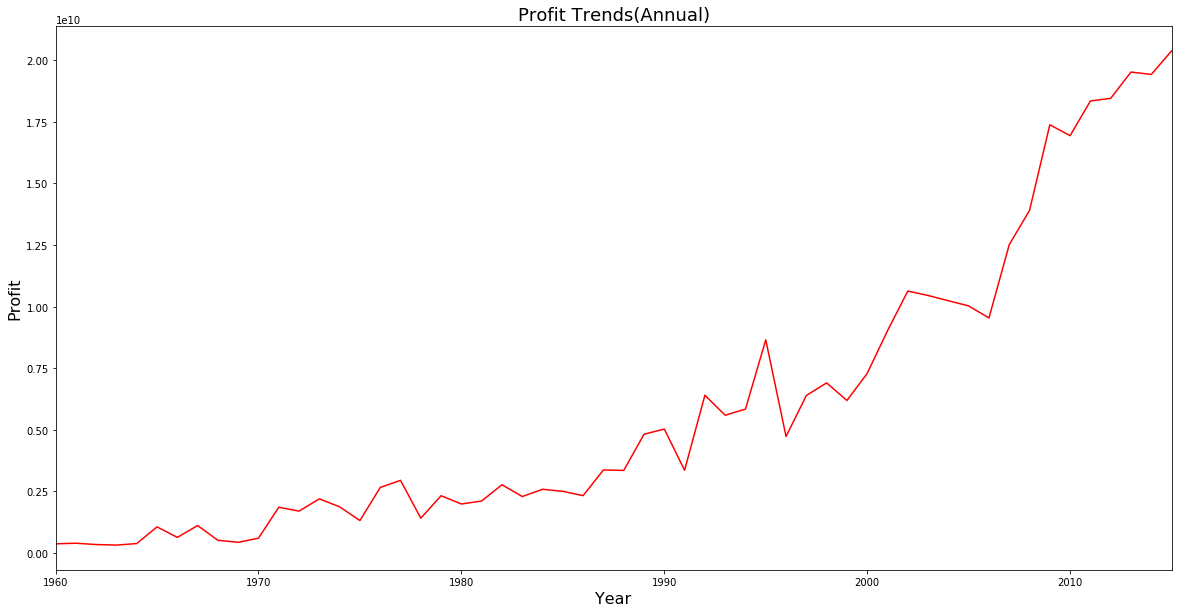

In [20]:
# Creating a simple Profit Trends plot.

df.groupby('release_year')['net_profit'].sum().plot(figsize = (20, 10), color='r')

plt.title('Profit Trends(Annual)', fontsize = 18)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Profit', fontsize = 16);

Profits are increasing over decades and have been increasing rapidly since the beginning of the 21st century.

<a id='correlation'></a>
### Is movie's popularity positively or negatively correlated to film production costs?

Text(0.5, 1.0, "Correlation between Budgets Invested and Movies' Popularity\n(Check it out!)")

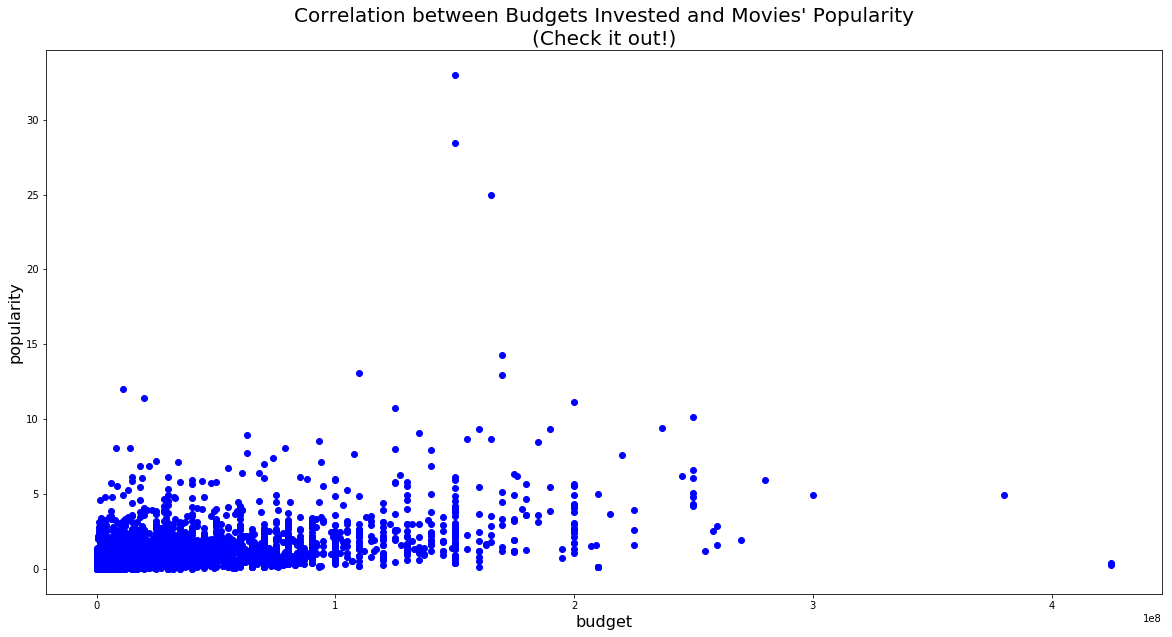

In [21]:
plt.figure(figsize=(20,10))
plt.scatter(df['budget'], df['popularity'], color='b')
plt.xlabel('budget', fontsize=16)
plt.ylabel('popularity', fontsize=16)
plt.title('Correlation between Budgets Invested and Movies\' Popularity\n(Check it out!)', fontsize=20)

<a id='director1'></a>
### Who are top 10 movie directors since 1960?

In [22]:
# Summing the net profit grouping by directors in descending order
# to read the data of top 10 movie directors based on overall net profits they have made.

df.groupby('director')['net_profit'].sum().sort_values(ascending=False).head(10).reset_index()

,director,net_profit
0,Steven Spielberg,7452504140
1,Peter Jackson,5226411577
2,James Cameron,5086149077
3,Michael Bay,3557208171
4,David Yates,3379295625
5,Chris Columbus,3377323529
6,Christopher Nolan,3160672996
7,Robert Zemeckis,2986603061
8,George Lucas,2955996893
9,J.J. Abrams,2839169916


In [23]:
# Storing the name of top 10 directors data the variable 'df_director'.

df_director = df.groupby('director')['net_profit'].sum().sort_values(ascending=False).head(10).reset_index().loc[:,'director']
df_director

0     Steven Spielberg
1        Peter Jackson
2        James Cameron
3          Michael Bay
4          David Yates
5       Chris Columbus
6    Christopher Nolan
7      Robert Zemeckis
8         George Lucas
9          J.J. Abrams
Name: director, dtype: object

In [24]:
# Storing the net profits of top 10 movie directors into 'df_director_revenue'


df_director_revenue = df.groupby('director')['net_profit'].sum().sort_values(ascending=False).head(10).reset_index().loc[:,'net_profit']
df_director_revenue

0    7452504140
1    5226411577
2    5086149077
3    3557208171
4    3379295625
5    3377323529
6    3160672996
7    2986603061
8    2955996893
9    2839169916
Name: net_profit, dtype: int64

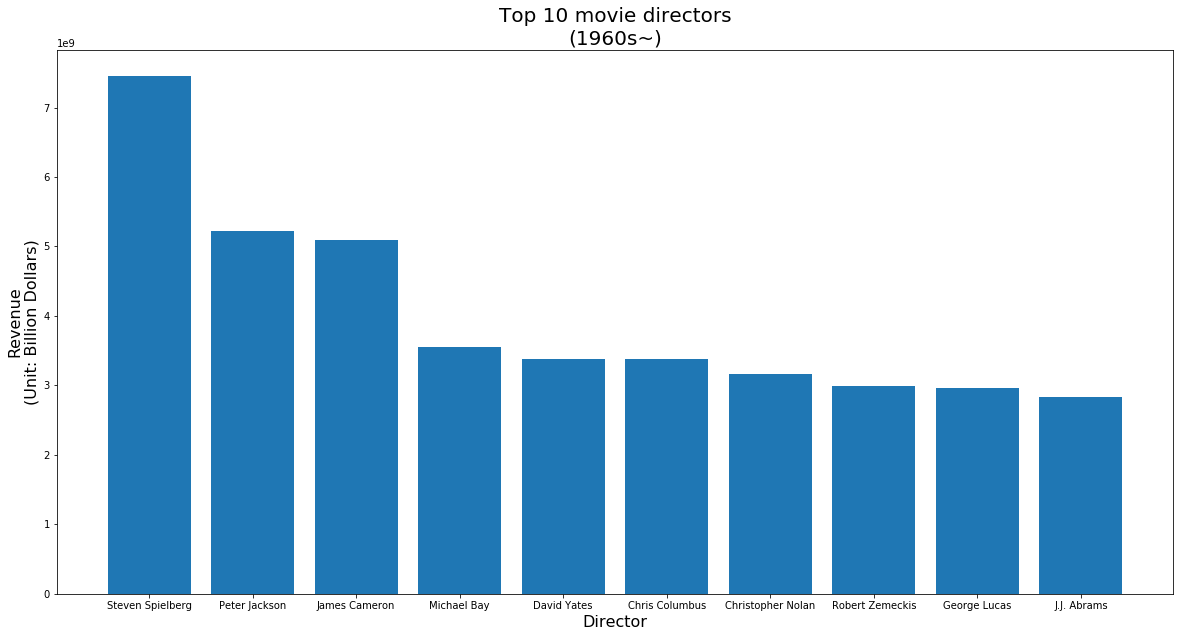

In [25]:
# Plotting bar chart of
# 'df_director' and 'df_director_revenue'


plt.figure(figsize=(20,10))
# refered to the code: 
# https://stackoverflow.com/questions/17109608/change-figure-size-and-figure-format-in-matplotlib/17109830
plt.bar(df_director, df_director_revenue)
plt.title('Top 10 movie directors\n(1960s~)', fontsize = 20)
plt.xlabel('Director', fontsize = 16)
plt.ylabel('Revenue\n(Unit: Billion Dollars)', fontsize = 16);

<a id='popularity'></a>
### Are their popularity distriuted in the similar proportion?

In [26]:
df_director

0     Steven Spielberg
1        Peter Jackson
2        James Cameron
3          Michael Bay
4          David Yates
5       Chris Columbus
6    Christopher Nolan
7      Robert Zemeckis
8         George Lucas
9          J.J. Abrams
Name: director, dtype: object

In [27]:
# We could obviously see that popularity doesn't necessarily come in accordance with number of net profit.

p = df.groupby('director')['popularity'].mean().sort_values(ascending=False).reset_index()
p.head(10)

,director,popularity
0,Colin Trevorrow,16.696886
1,Joe Russo|Anthony Russo,12.971027
2,Chad Stahelski|David Leitch,11.422751
3,Don Hall|Chris Williams,8.691294
4,Kyle Balda|Pierre Coffin,7.404165
5,MÃ¥ns MÃ¥rlind|BjÃ¶rn Stein,7.031452
6,Alan Taylor,6.883129
7,Christopher Nolan,6.865185
8,Pete Docter,6.326804
9,Alex Garland,6.118847


In [28]:
# The popularity of those top 10 movie directors in 'df_director',
# And storing the dataframe into 'df_director_popularity'

df_director_popularity = p.loc[p.director.isin(df_director)].sort_values(by='popularity' ,ascending=False)
df_director_popularity

,director,popularity
7,Christopher Nolan,6.865185
15,David Yates,5.126634
18,J.J. Abrams,4.800957
31,George Lucas,3.910306
34,Peter Jackson,3.774454
55,James Cameron,3.202686
109,Chris Columbus,2.251037
131,Michael Bay,2.023170
142,Robert Zemeckis,1.977627
169,Steven Spielberg,1.875138


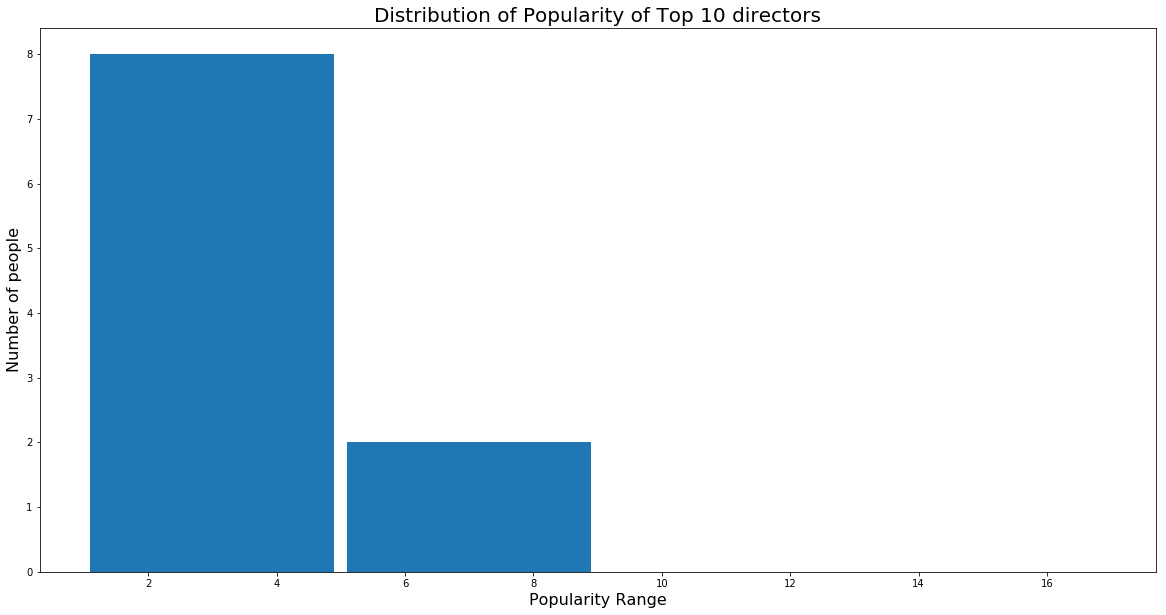

In [29]:
plt.figure(figsize=(20,10))
plt.hist(df_director_popularity.popularity, bins=[1,5,9,13,17], rwidth=0.95)

plt.xlabel('Popularity Range', fontsize = 16)
plt.ylabel('Number of people', fontsize = 16)
plt.title('Distribution of Popularity of Top 10 directors', fontsize = 20)
plt.show()

It shows that none of those Top 10 movie director has reached highest popularity(16).

<a id='director2'></a>
### Who are the 10 most successful movie directors in the past decade?

In [30]:
df_director_revenue_decade = df[df.release_year >= 2006].groupby('director')['net_profit'].sum().sort_values(ascending=False).head(10)
df_director_revenue_decade

director
David Yates          3379295625
Christopher Nolan    2839891903
J.J. Abrams          2839169916
James Cameron        2544505847
Joss Whedon          2424593677
Francis Lawrence     2346552348
Michael Bay          2271429295
Peter Jackson        2209048942
Carlos Saldanha      2169451792
James Wan            1747844742
Name: net_profit, dtype: int64

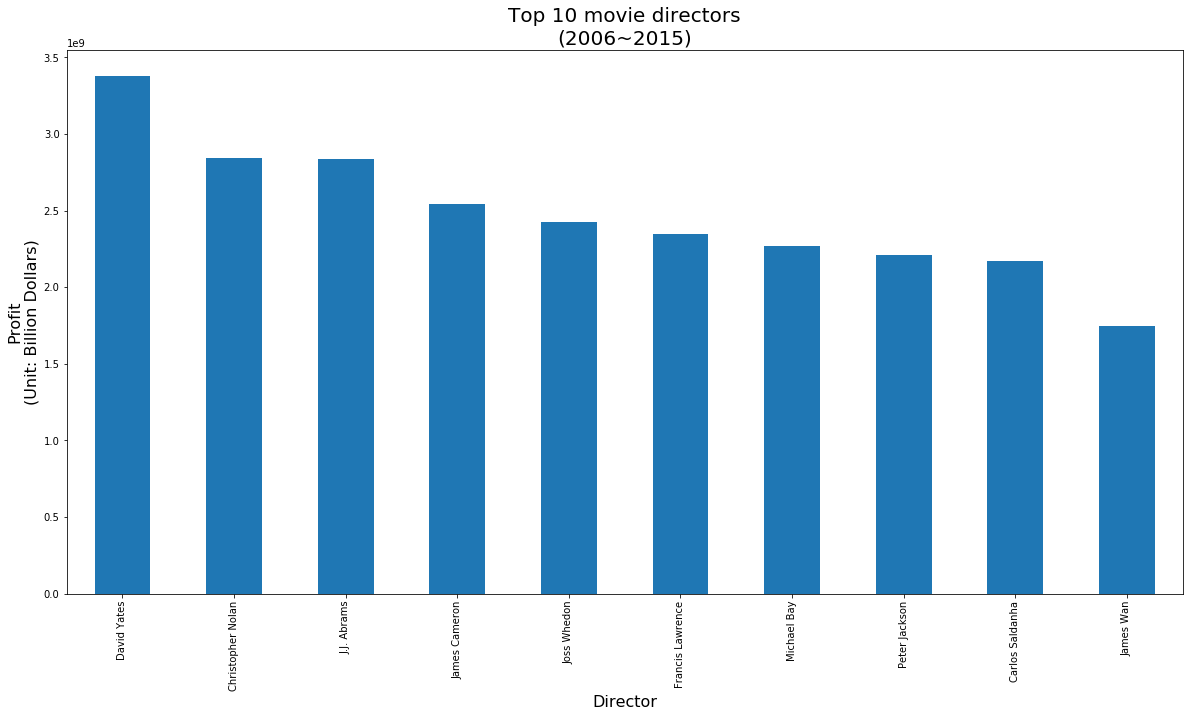

In [31]:
plt.figure(figsize=(20,10))
df_director_revenue_decade.plot(kind='bar')
plt.title('Top 10 movie directors\n(2006~2015)', fontsize = 20)
plt.xlabel('Director', fontsize = 16)
plt.ylabel('Profit\n(Unit: Billion Dollars)', fontsize = 16);

<a id='conclusions'></a>
## Conclusions

<ul>
<li>Profits made by movie industry have been increasing over time since 1960s, implying that the industry will become more profitable in the future.</li>
<li>There are no (positive or negative)correlation between film production cost and movie's popularity.</li>
<li>The popularity of movies made by those top 10 wealthiest movie directors are not the highest, which reaffirms that budgets invested in movies doesn't guarantee the popularity.</li>
<li>Compared with the list of top 10 movie directors over half century, there has been considerable change of Top 10 movie directors in the past decade.</li>
</ul>